In [2]:
import numpy as np
import pandas as pd
import os
import codecs
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
# Importing Gensim
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

# *Apply the LDA Algorithm*

## 1. Get the Corpus Sample 

In [3]:
path = "../src/data/corpus"
doc_complete = []
for i in os.listdir(path):
    if i.endswith('.txt'):
        with codecs.open(path+"/"+i, 'r', encoding='utf-8',errors='ignore') as f:
            doc_complete.append(f.read())

## 2. Tokenize and remove the Stopwords

In [4]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

## 3. Prepare the Corpus and Dictionary for the LDA Algorithm

In [5]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## 4. Apply the Gensim LDA Algorithm

In [6]:
NUM_TOPICS = 5
NUM_WORDS = 20

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, 
               num_topics= NUM_TOPICS, 
               id2word = dictionary, 
               random_state=100, 
               update_every=1, 
               chunksize=100, 
               passes=10, 
               alpha='auto', 
               per_word_topics=True)

## 5. Topic Words 

In [7]:
res = ldamodel.print_topics(num_topics= NUM_TOPICS, num_words= NUM_WORDS)
a_tab = [["topic","word","score"]]
for topic_i in res:
    # 0: is id, 1: str of all words
    t_id = topic_i[0] + 1
    t_words_str = topic_i[1]
    t_words = t_words_str.split(" + ")
    for a_t_word in t_words:
        a_t_word_parts = a_t_word.split("*")
        score = a_t_word_parts[0]
        the_word = a_t_word_parts[1].replace('"','')
        a_tab.append([t_id,the_word,score])

In [8]:
# Show the Table
#a_tab


# *PLOT Results*

In [9]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

## 1. PyLDAvis for a dynamic interactive visualization 

In [10]:
#pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

## 2. Plot Topic Words

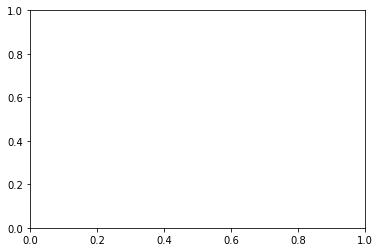

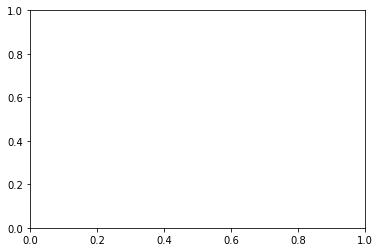

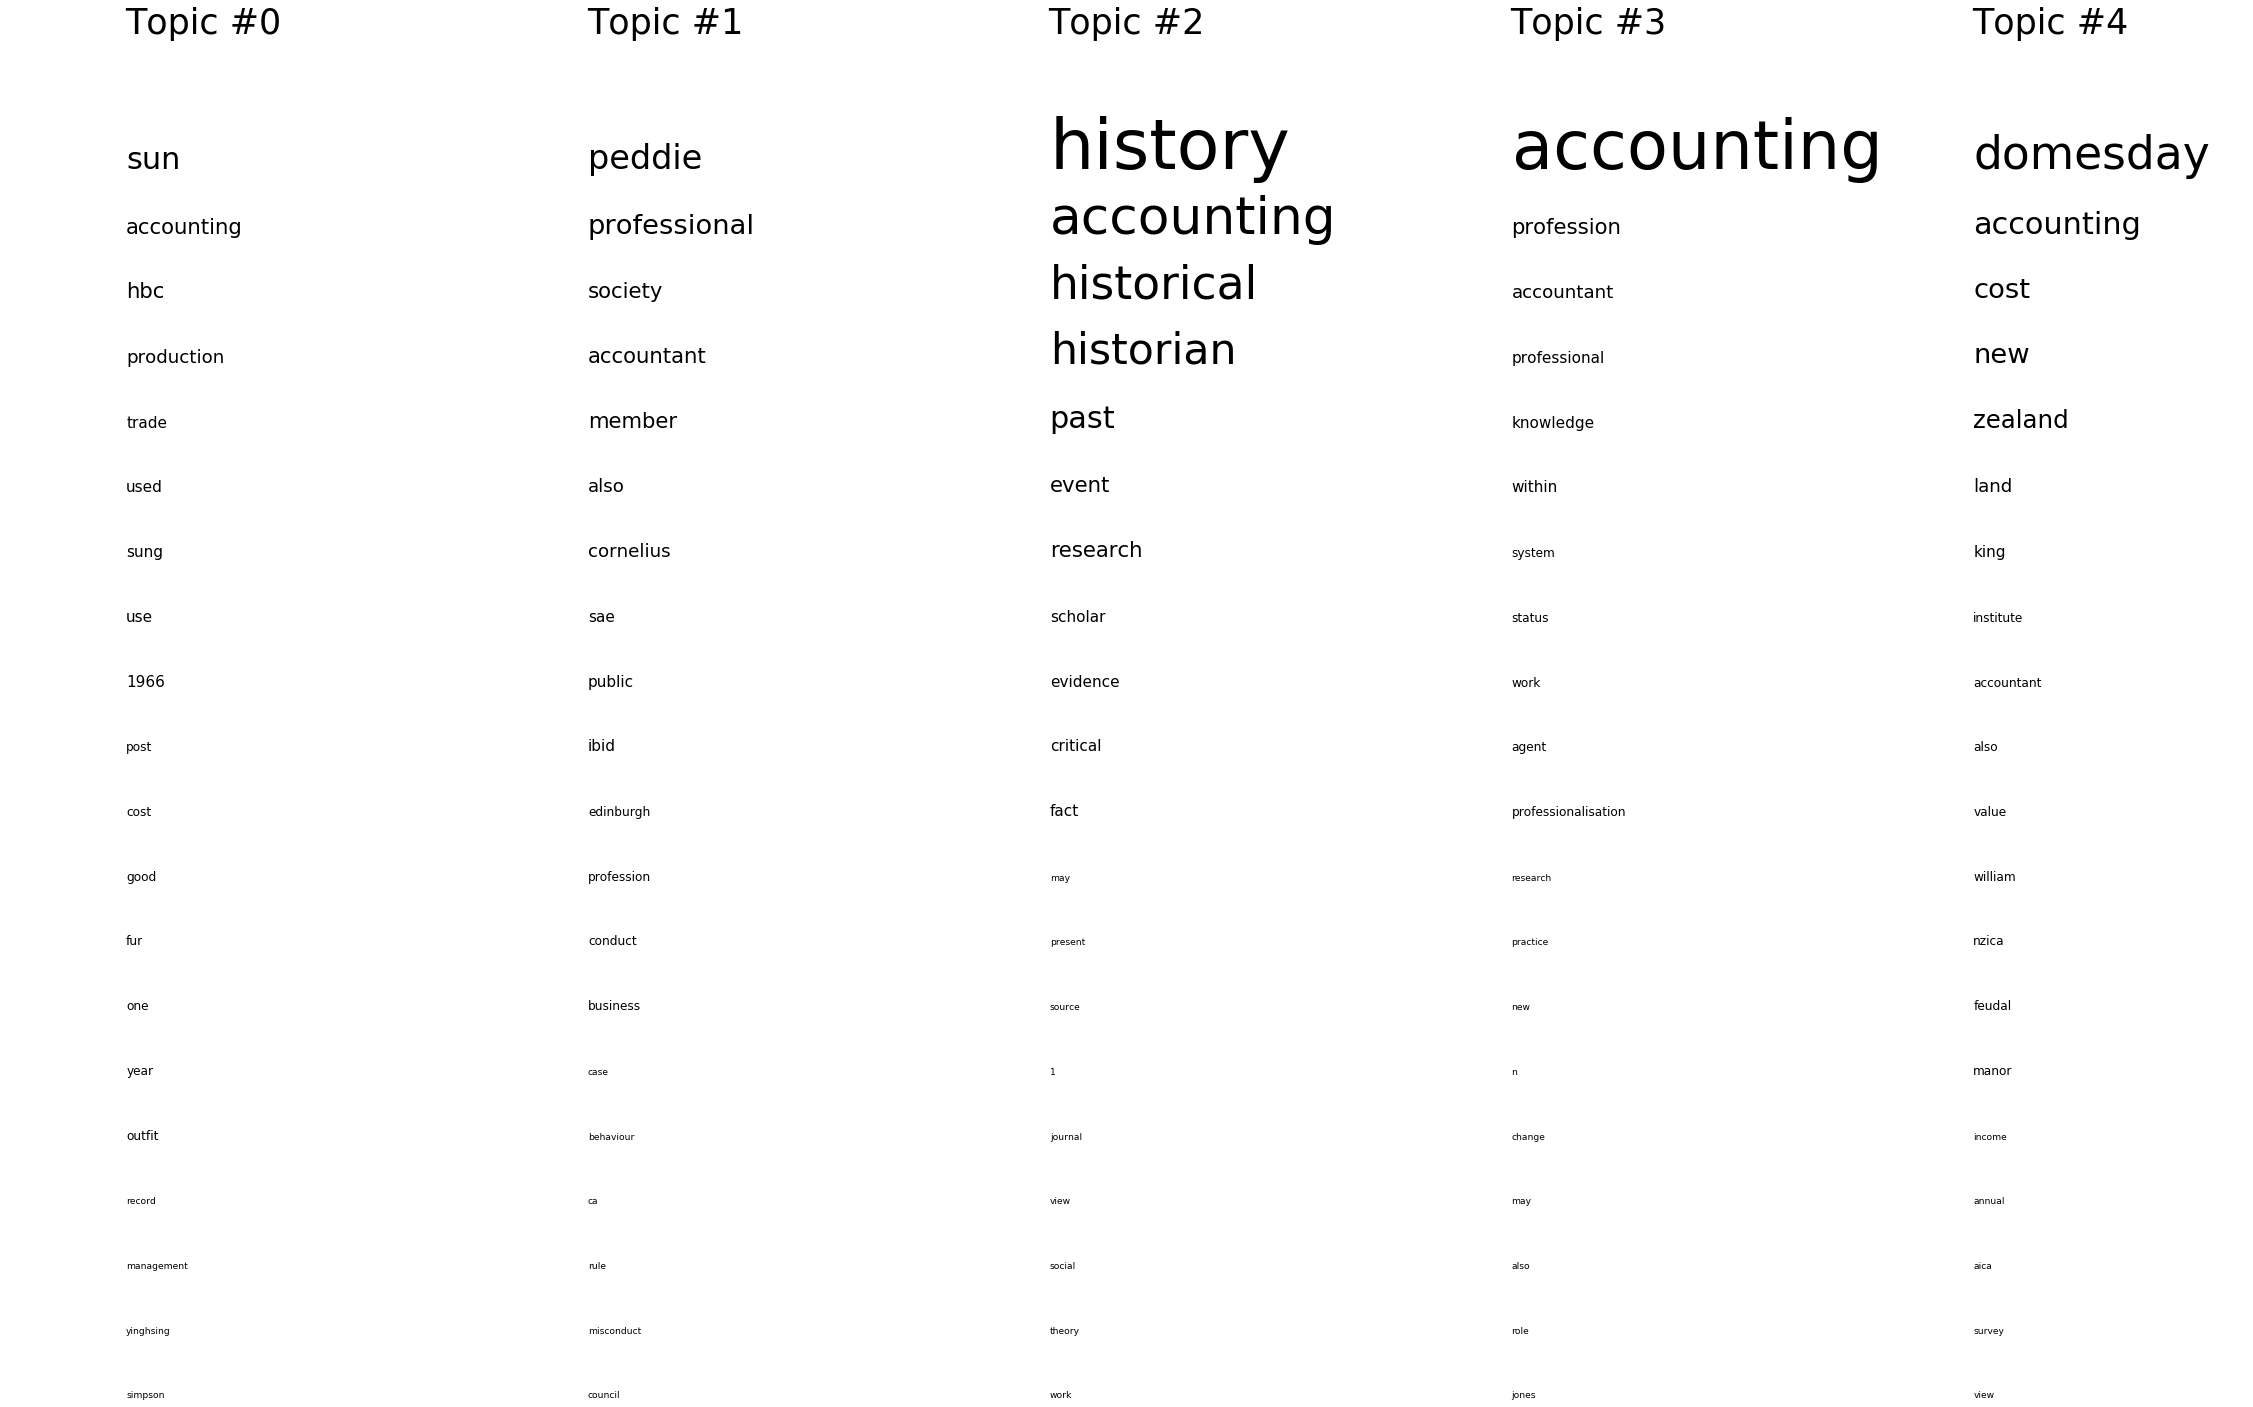

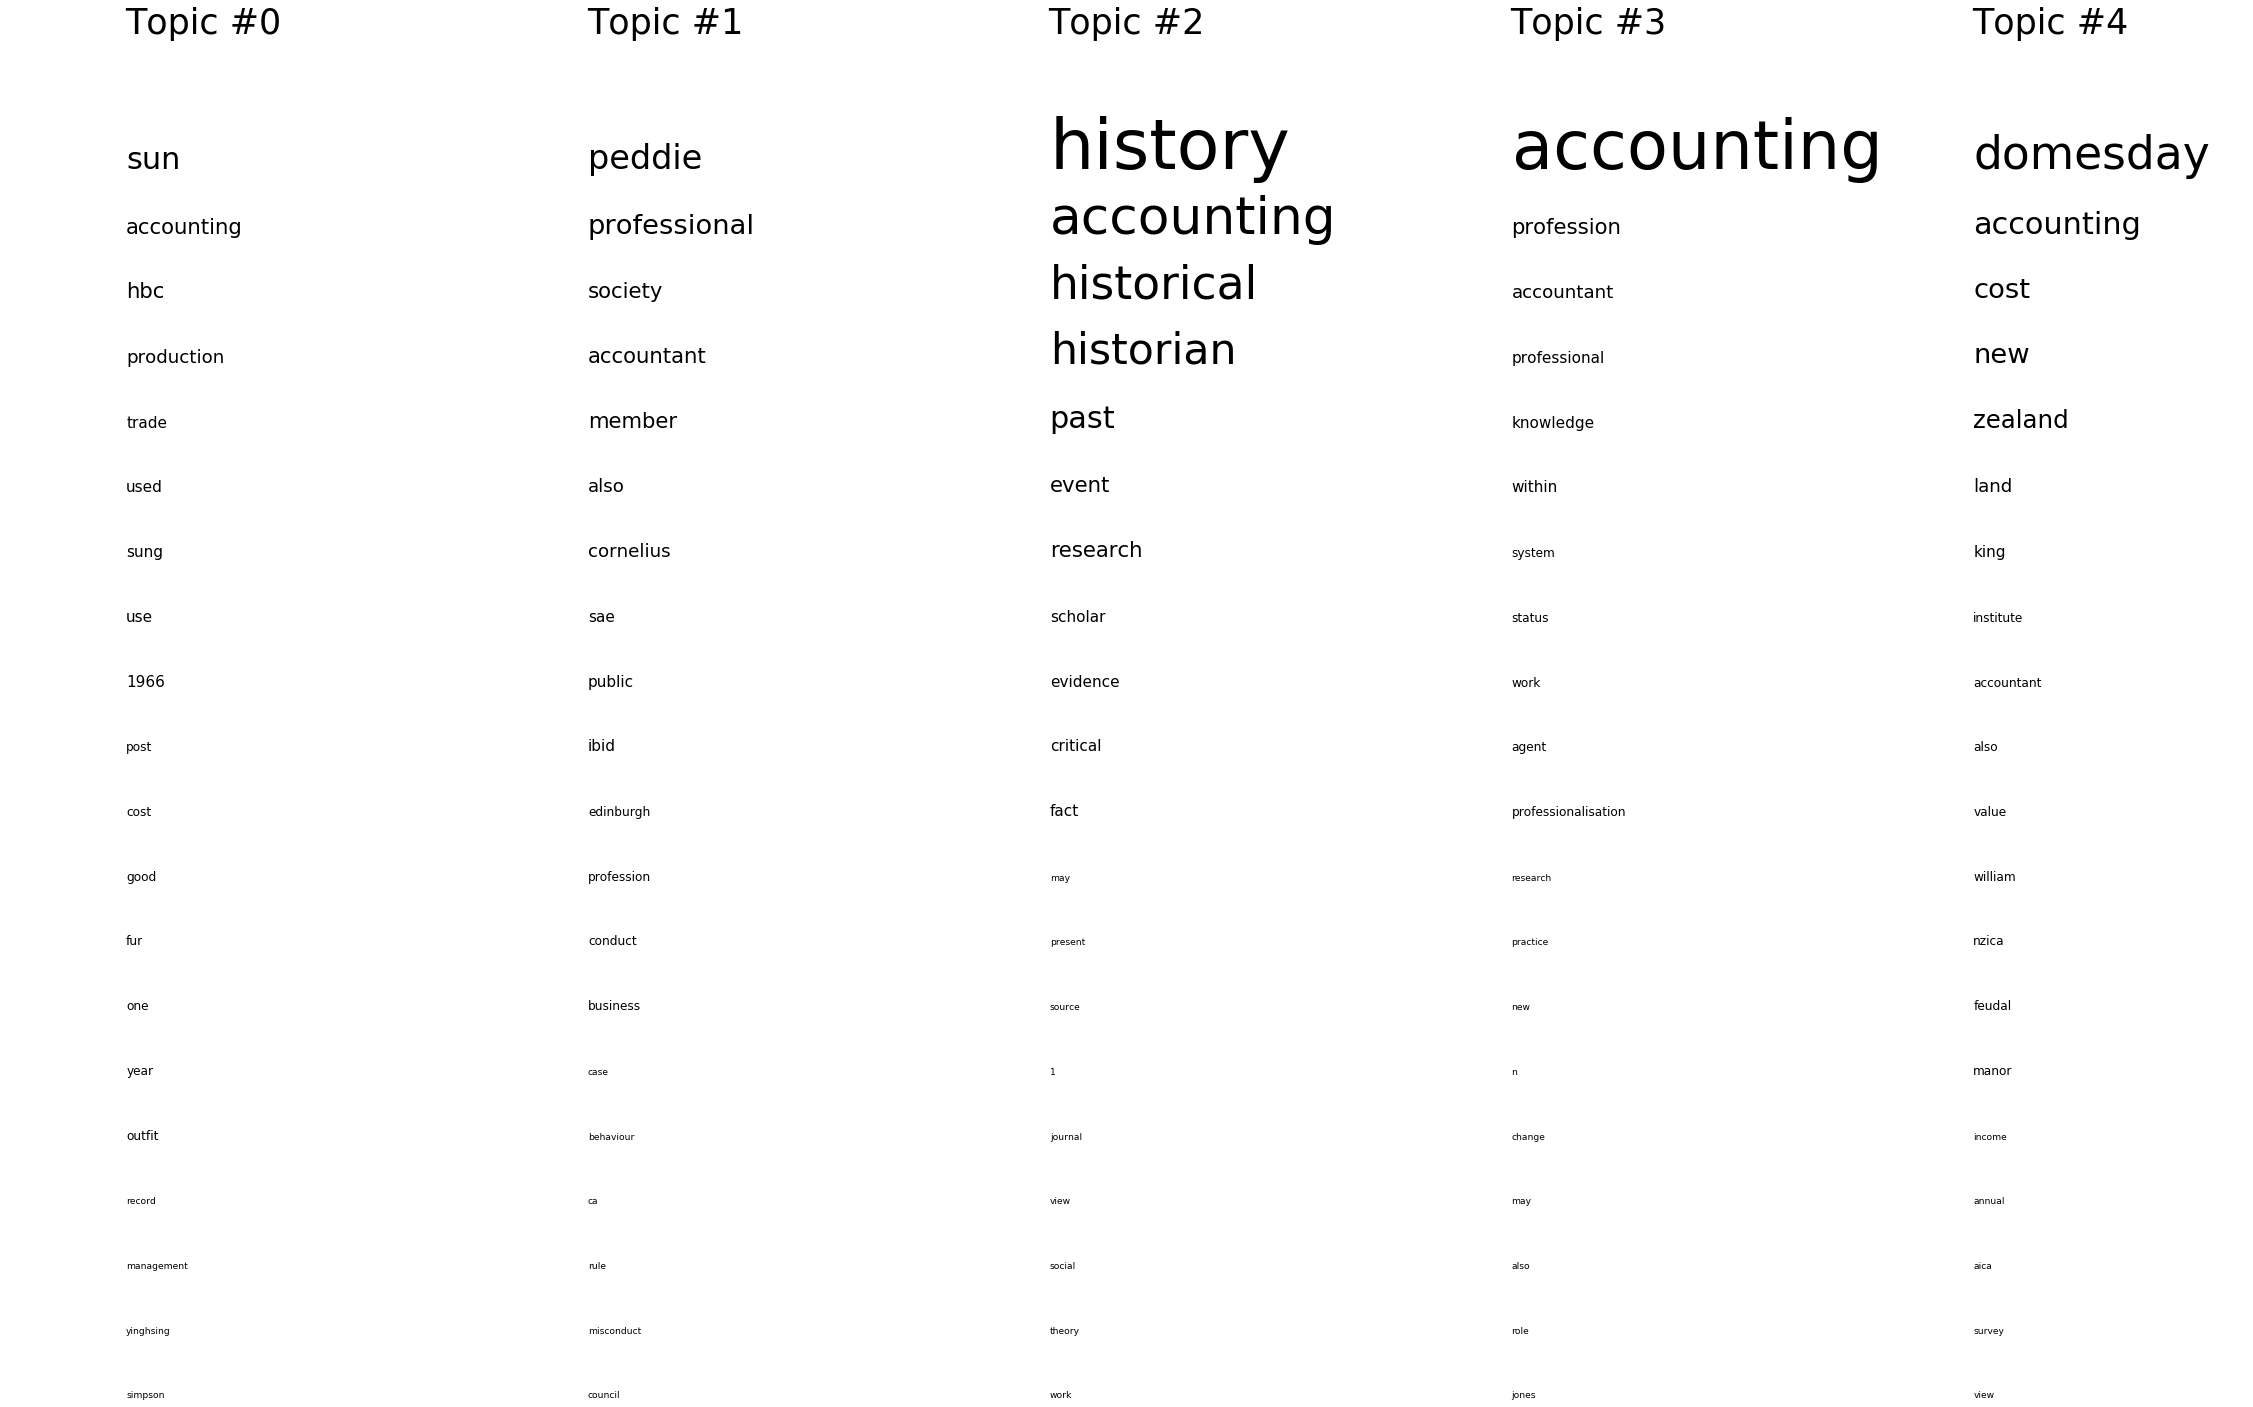

In [14]:
max_score = 0
for row_index in range(1,len(a_tab)):
    if float(a_tab[row_index][2]) > float(max_score): 
        max_score = a_tab[row_index][2]     

num_top_words = 10
MAXFONT = 70
fontsize_base = MAXFONT/ float(max_score)
#fontsize_base = 100
plt.clf()
plt.cla()
plt.figure(figsize=(NUM_TOPICS*8, NUM_TOPICS*2.5)) 

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.box(on=None)
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t), fontsize = MAXFONT/2, pad = MAXFONT)

    top_words = []
    for row_index in range(1,len(a_tab)):
        row = a_tab[row_index]
        if (row[0] == (t+1)):
            top_words.append(row[1:])

    for i in range(0,len(top_words)):
        word = top_words[i][0]
        score = float(top_words[i][1])
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base*score)

#plt.rcParams['figure.figsize'] = [30, NUM_TOPICS*5]
plt.savefig('/Users/ivan.heibi/Desktop/topicswords_chart.png', dpi = 200)